# Macroeconomic Predictor

This notebook will explore the effects of macroecnonomic factors on the stock market. For my analysis, I intend to specifically focus on the impacts on the S&P 500 index as that broadly generalizes the economic state of the top United States companies.

In [1]:
from alpaca.data import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
from datetime import datetime

from fredapi import Fred
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Task 1: Find S&P 500 Data

Given my initial research, I believe that Alpaca's python API should be able to give us all of the historical S&P 500 data we will need for this task. I requested the API key from Alpaca's website. For the sake of keeping all of my keys safe, I will import them from my local environment variables and use them for the execution of the notebook. 

### Alpaca

In [2]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

request_params = StockBarsRequest(
                        symbol_or_symbols="SPY",
                        timeframe=TimeFrame(1, TimeFrameUnit.Month),
                        start=datetime(2000, 1, 1),
                        end=datetime(2025, 3, 31)
                 )

bars = client.get_stock_bars(request_params)

bars_df = bars.df
bars_df

open    high       low     close  \
symbol timestamp                                                       
SPY    2016-01-01 05:00:00+00:00  200.49  201.90  181.0200  193.7208   
       2016-02-01 05:00:00+00:00  192.53  196.68  181.0900  193.3500   
       2016-03-01 05:00:00+00:00  195.01  210.55  194.4542  205.5200   
       2016-04-01 04:00:00+00:00  204.35  210.92  203.0900  206.3308   
       2016-05-01 04:00:00+00:00  206.92  210.69  202.7800  209.8400   
...                                  ...     ...       ...       ...   
       2024-11-01 04:00:00+00:00  571.32  603.35  567.8900  602.5500   
       2024-12-01 05:00:00+00:00  602.97  609.07  580.9100  586.0800   
       2025-01-01 05:00:00+00:00  589.39  610.78  575.3500  601.8200   
       2025-02-01 05:00:00+00:00  592.67  613.23  582.4400  594.1800   
       2025-03-01 05:00:00+00:00  596.18  597.34  546.8700  559.3900   

                                        volume  trade_count        vwap  
symbol timestamp                                                         
SPY    2016-01-01 05:00:00+00:00  3.818766e+09   13463245.0  191.091533  
       2016-02-01 05:00:00+00:00  2.982148e+09   11420093.0  189.635941  
       2016-03-01 05:00:00+00:00  2.415842e+09    8659580.0  201.753616  
       2016-04-01 04:00:00+00:00  1.986942e+09    6822081.0  207.013830  
       2016-05-01 04:00:00+00:00  1.894023e+09    6744944.0  206.421586  
...                                        ...          ...         ...  
       2024-11-01 04:00:00+00:00  9.017136e+08    8153583.0  591.063999  
       2024-12-01 05:00:00+00:00  1.059637e+09    8707117.0  597.726175  
       2025-01-01 05:00:00+00:00  9.966060e+08    9472819.0  594.647469  
       2025-02-01 05:00:00+00:00  8.703271e+08    9571250.0  600.010040  
       2025-03-01 05:00:00+00:00  1.496984e+09   14496911.0  567.019153  

[111 rows x 7 columns]

Unfortunately, I can tell that Alpaca is not the right dataset to use to get S&P 500 data as it does not go all the way back to the index's inception. Instead, I will try using **fredapi**'s built in S&P 500 tracker to see if that goes all the way to the index's origins.

### FredAPI

Before starting with **fredapi**, I first had to get a key from them. This was done by applying from their website.

In [2]:
fred_key = os.getenv('FRED_KEY')
fred = Fred(api_key=fred_key)

In [4]:
# Get S&P 500 index data (daily closes)
sp500_fred = fred.get_series('SP500')

# Convert to DataFrame
sp500_fred

2015-08-10    2104.18
2015-08-11    2084.07
2015-08-12    2086.05
2015-08-13    2083.39
2015-08-14    2091.54
               ...   
2025-08-04    6329.94
2025-08-05    6299.19
2025-08-06    6345.06
2025-08-07    6340.00
2025-08-08    6389.45
Length: 2610, dtype: float64

FRED is also not the right source as it doesn't go all the way back to the inception of the S&P 500. I have also found that **yfinance** might have the capabilities/data to support the predictive task.

### yfinance

In [3]:
# S&P 500 Index (not an ETF)
sp500_yf = yf.download("^GSPC", start="1950-01-01", interval="1d", auto_adjust=True)
sp500_yf

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2025-08-05,6299.189941,6346.000000,6289.370117,6336.629883,5517410000
2025-08-06,6345.060059,6352.830078,6301.109863,6309.299805,5408560000


Given that the "**yfinance**" library does have a ticker that has data all the way back since the S&P 500's inception, I will use this dataset to merge into our macroeconomic factors DataFrame. Also, since I only need the close price of each day, I will drop all of the other columns in the dataframe to leave myself with just the close column.

In [4]:
# Keep only the close price
sp500 = sp500_yf[['Close']]
sp500 = sp500.rename(columns={'Close': 'SP500_Close'})
sp500 = sp500.resample('MS').last()
sp500

Price,SP500_Close
Ticker,^GSPC
Date,
1950-01-01,17.049999
1950-02-01,17.219999
1950-03-01,17.290001
1950-04-01,17.959999
1950-05-01,18.780001
...,...
2025-04-01,5569.060059
2025-05-01,5911.689941


In [5]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 908 entries, 1950-01-01 to 2025-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (SP500_Close, ^GSPC)  908 non-null    float64
dtypes: float64(1)
memory usage: 14.2 KB


In [6]:
sp500.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
SP500_Close,^GSPC,908.0,893.28903,1263.335305,17.049999,89.245001,271.964996,1260.075012,6373.450195


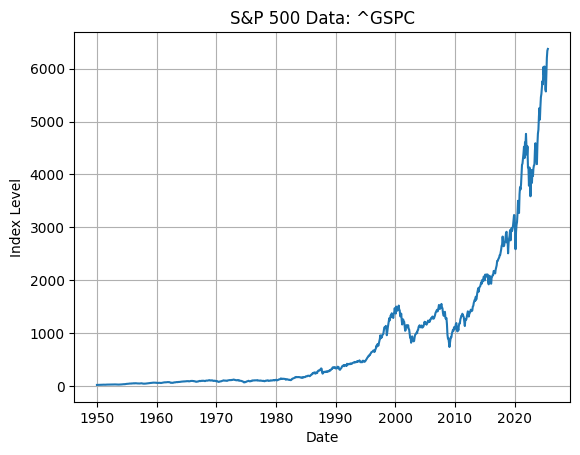

In [7]:
plt.plot(sp500)
plt.title('S&P 500 Data: ^GSPC')
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.grid(True)

**NOTE**: I will also make my target variable to be percent change from the current S&P 500 value. This is because I still want to assume some sort of stationarity with our data, and I want to make my models more statistically sound. Because the graph of the S&P 500 value has exponentially increased over time, I would think that predicting the percent change will yield more stable mean, median, and variance values.

I will also shift the percent changes between the current month and the previous month up by one row. This is because my goal for this task is to have my current month's macroeconomic data successfully predict the percent change to next month's stock values. The shift will accomplish that idea.

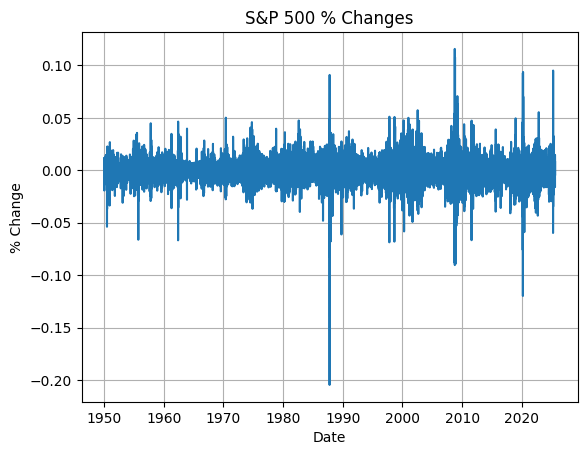

In [114]:
plt.plot(sp500)
plt.title('S&P 500 % Changes') 
plt.xlabel('Date')
plt.ylabel('% Change')
plt.grid(True)

## Task 2: Find Macroeconomic Data

Now that our S&P 500 data has been secured as our response variable, I will now find all of the macroeconomic features that I want to compare against each other in order to fulfill the research question I originally posed. Not only do I want to quantify the effects of macroeconomic factors on the stock market, but I want to evaluate which of these features has the most impact, either positive or negative. To meet that goal, I have read through the **fredapi** documentation and other articles on impactful macroeconomic factors to find the features that I think best represent the areas that highlight important macroeconomic factors. The list is as follows:

CPI: Consumer Price Index

UNRATE: Unemployment Rate

FEDFUNDS: Federal Funds Rate

GS10: 10 Year Treasury Rate

M2: Money Supply - how much money is in circulation

INDPRO: Industrial Production Index

RSAFS: Retail and Food Service Sales

UMCSENT: University of Michigan Consumer Sentiment Index

HOUST: Housing Starts

MSPUS: Median House Price

TWEXB: US Dollar Strength

NETEXP: Net Exports

In [8]:
start_date="1947-01-01"
macro_factors = {
    'CPI': 'CPIAUCSL',
    'UNRATE': 'UNRATE',
    'FEDFUNDS': 'FEDFUNDS',
    'GS10': 'GS10',
    'M2': 'M2SL',
    'INDPRO': 'INDPRO',
    'RSAFS': 'RSAFS',
    'UMCSENT': 'UMCSENT',
    'HOUST': 'HOUST',
    'MSPUS': 'MSPUS',
    'TWEXB': 'TWEXB',
    'NETEXP': 'NETEXP'
}

fred_df = pd.DataFrame()

# Add each of the macroeconomic features to the dataframe
for key, value in macro_factors.items():
    data = fred.get_series(value)
    fred_df[key] = data

fred_df

,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,RSAFS,UMCSENT,HOUST,MSPUS,TWEXB,NETEXP
1947-01-01,21.480,NaN,NaN,NaN,NaN,13.6554,NaN,NaN,NaN,NaN,NaN,10.875
1947-02-01,21.620,NaN,NaN,NaN,NaN,13.7361,NaN,NaN,NaN,NaN,NaN,NaN
1947-03-01,22.000,NaN,NaN,NaN,NaN,13.8167,NaN,NaN,NaN,NaN,NaN,NaN
1947-04-01,22.000,NaN,NaN,NaN,NaN,13.7092,NaN,NaN,NaN,NaN,NaN,11.294
1947-05-01,21.950,NaN,NaN,NaN,NaN,13.7629,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,319.775,4.1,4.33,4.45,21584.1,103.9397,711757.0,64.7,1490.0,NaN,NaN,NaN
2025-03-01,319.615,4.2,4.33,4.28,21656.9,103.6682,722572.0,57.0,1355.0,NaN,NaN,NaN
2025-04-01,320.321,4.2,4.33,4.28,21804.5,103.6912,721789.0,52.2,1398.0,410800.0,NaN,-872.384
2025-05-01,320.580,4.2,4.33,4.42,21883.6,103.6602,715541.0,52.2,1263.0,NaN,NaN,NaN


In [9]:
fred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 1947-01-01 to 2025-06-01
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPI       942 non-null    float64
 1   UNRATE    930 non-null    float64
 2   FEDFUNDS  852 non-null    float64
 3   GS10      867 non-null    float64
 4   M2        798 non-null    float64
 5   INDPRO    942 non-null    float64
 6   RSAFS     402 non-null    float64
 7   UMCSENT   662 non-null    float64
 8   HOUST     798 non-null    float64
 9   MSPUS     250 non-null    float64
 10  TWEXB     43 non-null     float64
 11  NETEXP    314 non-null    float64
dtypes: float64(12)
memory usage: 95.7 KB


In [10]:
fred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CPI,942.0,122.785025,88.244421,21.4800,32.6750,109.45000,198.625000,321.5000
UNRATE,930.0,5.673441,1.707980,2.5000,4.3000,5.50000,6.700000,14.8000
FEDFUNDS,852.0,4.607383,3.555070,0.0500,1.8675,4.33000,6.140000,19.1000
GS10,867.0,5.542457,2.884614,0.6200,3.5300,4.78000,7.340000,15.3200
M2,798.0,5553.556391,5918.107190,286.6000,985.2000,3396.25000,8014.300000,22020.8000
INDPRO,942.0,60.291573,30.680204,13.1716,34.5688,55.05625,92.664525,104.1038
RSAFS,402.0,376394.898010,149044.264577,158647.0000,266215.2500,352147.50000,461891.750000,722572.0000
UMCSENT,662.0,85.019335,13.124429,50.0000,75.0000,88.80000,94.700000,112.0000
HOUST,798.0,1431.770677,378.406785,478.0000,1210.5000,1452.00000,1646.000000,2494.0000
MSPUS,250.0,158201.200000,117810.565553,17800.0000,56825.0000,129850.00000,236200.000000,442600.0000


**NOTE**: Because the problem I am trying to solve involves trying to predict future stock market movement/trends based on current macroeconomic data, I have read that it is wise to lag the data provided by 'fred_df' since that will simulate us predicting into the future. This is because a lot of the macroeconomic factors don't show their impacts on the stock market until later on. As an arbitrary starting point, I will add 3 consecutive months of lag. 

In [11]:
# Add 3 months of lag
cols = fred_df.columns
for lag in range(1, 4):
    for col in cols:
        fred_df[f'{col}_lag_{lag}'] = fred_df[col].shift(lag)

fred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 1947-01-01 to 2025-06-01
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CPI             942 non-null    float64
 1   UNRATE          930 non-null    float64
 2   FEDFUNDS        852 non-null    float64
 3   GS10            867 non-null    float64
 4   M2              798 non-null    float64
 5   INDPRO          942 non-null    float64
 6   RSAFS           402 non-null    float64
 7   UMCSENT         662 non-null    float64
 8   HOUST           798 non-null    float64
 9   MSPUS           250 non-null    float64
 10  TWEXB           43 non-null     float64
 11  NETEXP          314 non-null    float64
 12  CPI_lag_1       941 non-null    float64
 13  UNRATE_lag_1    929 non-null    float64
 14  FEDFUNDS_lag_1  851 non-null    float64
 15  GS10_lag_1      866 non-null    float64
 16  M2_lag_1        797 non-null    float64
 17  INDPRO_lag_1    

## Task 3: Join the Datasets

In [12]:
# Ensure both indices are datetime and have same alignment
sp500.index = pd.to_datetime(sp500.index).to_period('M').to_timestamp(how='end')
fred_df.index = pd.to_datetime(fred_df.index).to_period('M').to_timestamp(how='end')

# Flatten the index from multi-level index to single index
sp500.columns = sp500.columns.get_level_values(0)

# Join the two dataframes
combined_df = fred_df.join(sp500, how='inner')

print(combined_df.info())
combined_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 906 entries, 1950-01-31 23:59:59.999999999 to 2025-06-30 23:59:59.999999999
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CPI             906 non-null    float64
 1   UNRATE          906 non-null    float64
 2   FEDFUNDS        852 non-null    float64
 3   GS10            867 non-null    float64
 4   M2              798 non-null    float64
 5   INDPRO          906 non-null    float64
 6   RSAFS           402 non-null    float64
 7   UMCSENT         662 non-null    float64
 8   HOUST           798 non-null    float64
 9   MSPUS           250 non-null    float64
 10  TWEXB           43 non-null     float64
 11  NETEXP          302 non-null    float64
 12  CPI_lag_1       906 non-null    float64
 13  UNRATE_lag_1    906 non-null    float64
 14  FEDFUNDS_lag_1  851 non-null    float64
 15  GS10_lag_1      866 non-null    float64
 16  M2_lag_1        797 non

,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,RSAFS,UMCSENT,HOUST,MSPUS,...,GS10_lag_3,M2_lag_3,INDPRO_lag_3,RSAFS_lag_3,UMCSENT_lag_3,HOUST_lag_3,MSPUS_lag_3,TWEXB_lag_3,NETEXP_lag_3,SP500_Close
1950-01-31 23:59:59.999999999,23.510,6.5,NaN,NaN,NaN,14.0049,NaN,NaN,NaN,NaN,...,NaN,NaN,13.1716,NaN,NaN,NaN,NaN,NaN,2.999,17.049999
1950-02-28 23:59:59.999999999,23.610,6.4,NaN,NaN,NaN,14.0586,NaN,NaN,NaN,NaN,...,NaN,NaN,13.5210,NaN,NaN,NaN,NaN,NaN,NaN,17.219999
1950-03-31 23:59:59.999999999,23.640,6.3,NaN,NaN,NaN,14.5156,NaN,NaN,NaN,NaN,...,NaN,NaN,13.7629,NaN,NaN,NaN,NaN,NaN,NaN,17.290001
1950-04-30 23:59:59.999999999,23.650,5.8,NaN,NaN,NaN,14.9995,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0049,NaN,NaN,NaN,NaN,NaN,2.203,17.959999
1950-05-31 23:59:59.999999999,23.770,5.5,NaN,NaN,NaN,15.3489,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0586,NaN,NaN,NaN,NaN,NaN,NaN,18.780001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28 23:59:59.999999999,319.775,4.1,4.33,4.45,21584.1,103.9397,711757.0,64.7,1490.0,NaN,...,4.36,21424.3,101.9503,712145.0,71.8,1295.0,NaN,NaN,NaN,5954.500000
2025-03-31 23:59:59.999999999,319.615,4.2,4.33,4.28,21656.9,103.6682,722572.0,57.0,1355.0,NaN,...,4.39,21441.8,103.0447,717662.0,74.0,1514.0,NaN,NaN,NaN,5611.850098
2025-04-30 23:59:59.999999999,320.321,4.2,4.33,4.28,21804.5,103.6912,721789.0,52.2,1398.0,410800.0,...,4.63,21510.9,102.8805,711461.0,71.7,1358.0,423100.0,NaN,-1245.141,5569.060059
2025-05-31 23:59:59.999999999,320.580,4.2,4.33,4.42,21883.6,103.6602,715541.0,52.2,1263.0,NaN,...,4.45,21584.1,103.9397,711757.0,64.7,1490.0,NaN,NaN,NaN,5911.689941


## Task 4: Clean the Data

### Drop Duplicates

There should be no duplicates (because this is a time series), but just in case there was something wrong with the sampling or the API, I will attempt to drop any duplicates.

In [13]:
combined_df.drop_duplicates(inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 906 entries, 1950-01-31 23:59:59.999999999 to 2025-06-30 23:59:59.999999999
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CPI             906 non-null    float64
 1   UNRATE          906 non-null    float64
 2   FEDFUNDS        852 non-null    float64
 3   GS10            867 non-null    float64
 4   M2              798 non-null    float64
 5   INDPRO          906 non-null    float64
 6   RSAFS           402 non-null    float64
 7   UMCSENT         662 non-null    float64
 8   HOUST           798 non-null    float64
 9   MSPUS           250 non-null    float64
 10  TWEXB           43 non-null     float64
 11  NETEXP          302 non-null    float64
 12  CPI_lag_1       906 non-null    float64
 13  UNRATE_lag_1    906 non-null    float64
 14  FEDFUNDS_lag_1  851 non-null    float64
 15  GS10_lag_1      866 non-null    float64
 16  M2_lag_1        797 non

### Drop NA

TWEXB             863
TWEXB_lag_2       863
TWEXB_lag_3       863
TWEXB_lag_1       863
MSPUS_lag_3       657
MSPUS             656
MSPUS_lag_2       656
MSPUS_lag_1       656
NETEXP            604
NETEXP_lag_2      604
NETEXP_lag_1      604
NETEXP_lag_3      604
RSAFS_lag_3       507
RSAFS_lag_2       506
RSAFS_lag_1       505
RSAFS             504
UMCSENT_lag_3     247
UMCSENT_lag_2     246
UMCSENT_lag_1     245
UMCSENT           244
M2_lag_3          111
HOUST_lag_3       111
M2_lag_2          110
HOUST_lag_2       110
HOUST_lag_1       109
M2_lag_1          109
M2                108
HOUST             108
FEDFUNDS_lag_3     57
FEDFUNDS_lag_2     56
FEDFUNDS_lag_1     55
FEDFUNDS           54
GS10_lag_3         42
GS10_lag_2         41
GS10_lag_1         40
GS10               39
UNRATE_lag_1        0
CPI                 0
CPI_lag_1           0
UNRATE              0
INDPRO              0
INDPRO_lag_2        0
UNRATE_lag_2        0
INDPRO_lag_1        0
CPI_lag_2           0
UNRATE_lag

Text(0.5, 1.0, 'Missing Macroeconomic Data by Feature')

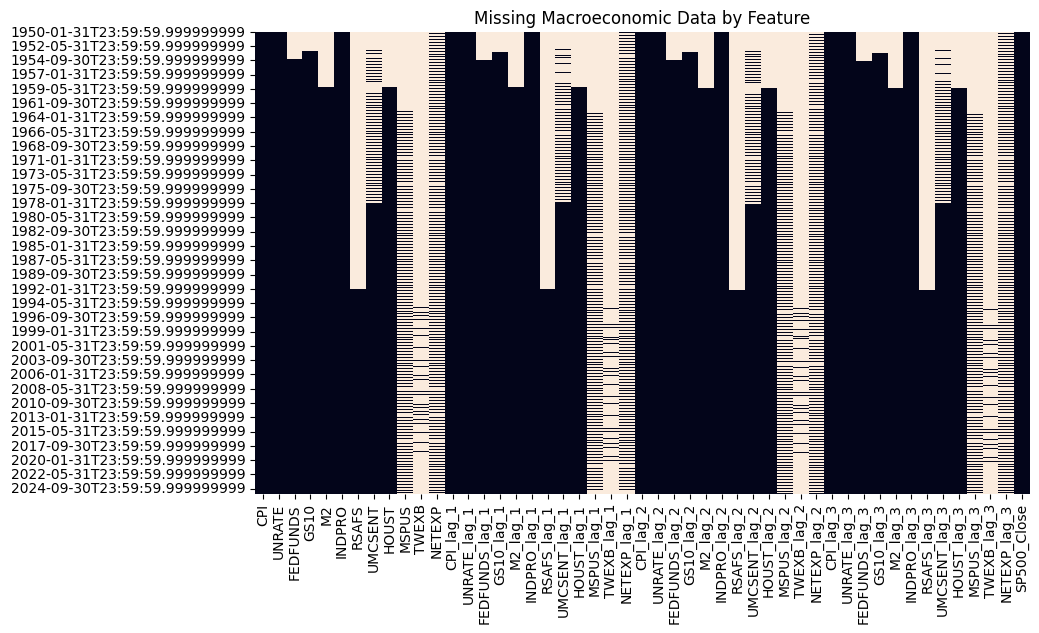

In [14]:
# Count missing values
missing = combined_df.isnull().sum().sort_values(ascending=False)
print(missing)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cbar=False)
plt.title("Missing Macroeconomic Data by Feature")

After analyzing our initial macroeconomic features, I can see that the features with the most missing values are "RSAFS: Retail and Food Service Sales" and "TWEXB: US Dollar Strength". Because these features have such limited amounts of data, I would rather choose to drop them from our dataframe entirely such that we can retain as much of the data as possible. Despite how much I believe they can contribute meaningful value to the analysis of macroeconomic impacts on the stock market, I would rather drop them for the sake of not having to impute the data with proper values. For the rest of the missing data, most of these features are missing data at the beginning of their series. As a result, I plan to drop all null/NA values until I get the data to a point where all of the features have a value that I can forward fill if necessary.

In [15]:
combined_df.drop(columns=['TWEXB', 'RSAFS'], inplace=True)
combined_df = combined_df.ffill()
combined_df.dropna(inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 1995-05-31 23:59:59.999999999 to 2025-06-30 23:59:59.999999999
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CPI             362 non-null    float64
 1   UNRATE          362 non-null    float64
 2   FEDFUNDS        362 non-null    float64
 3   GS10            362 non-null    float64
 4   M2              362 non-null    float64
 5   INDPRO          362 non-null    float64
 6   UMCSENT         362 non-null    float64
 7   HOUST           362 non-null    float64
 8   MSPUS           362 non-null    float64
 9   NETEXP          362 non-null    float64
 10  CPI_lag_1       362 non-null    float64
 11  UNRATE_lag_1    362 non-null    float64
 12  FEDFUNDS_lag_1  362 non-null    float64
 13  GS10_lag_1      362 non-null    float64
 14  M2_lag_1        362 non-null    float64
 15  INDPRO_lag_1    362 non-null    float64
 16  RSAFS_lag_1     362 non

## Task 5: Visualize the Features

Now that we have our feature dataframe all tidy, I will now graph the features to see if we can extract any preliminary analysis about the data. Below, I will start by showing the trends of each feature over time.

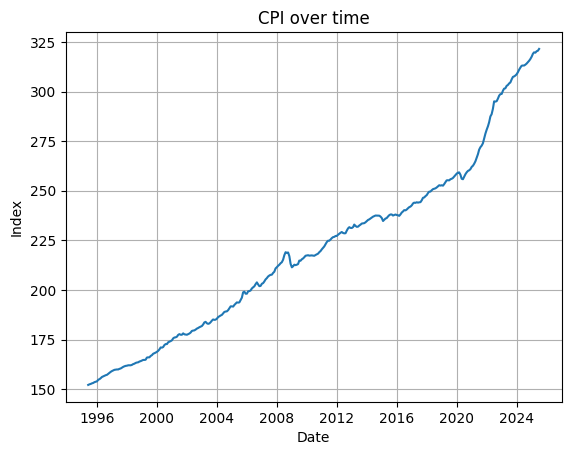

In [16]:
# Examine CPI trends
sns.lineplot(combined_df['CPI'])
plt.title('CPI over time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)

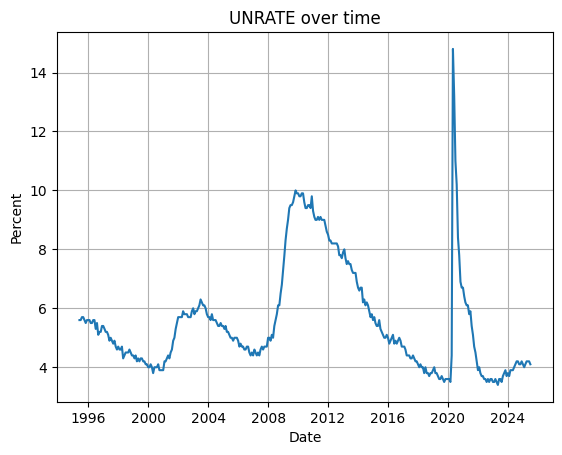

In [17]:
# Examine unemployment rate trends
sns.lineplot(combined_df['UNRATE'])
plt.title('UNRATE over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

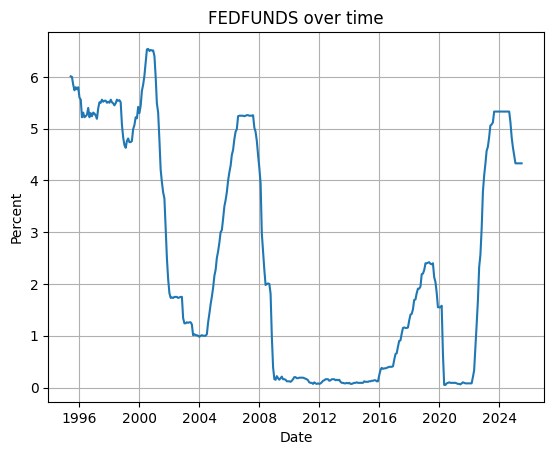

In [18]:
# Examine federal funds rate trends
sns.lineplot(combined_df['FEDFUNDS'])
plt.title('FEDFUNDS over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

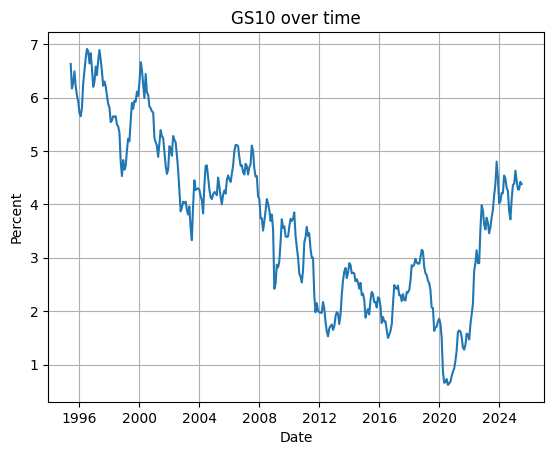

In [19]:
# Examine GS10 trends
sns.lineplot(combined_df['GS10'])
plt.title('GS10 over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

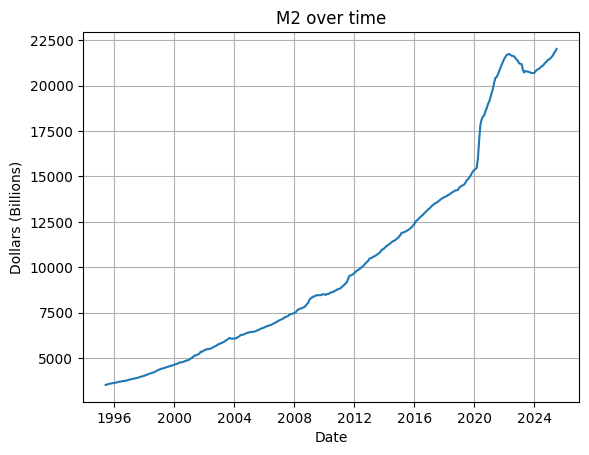

In [20]:
# Examine M2 trends
sns.lineplot(combined_df['M2'])
plt.title('M2 over time')
plt.xlabel('Date')
plt.ylabel('Dollars (Billions)')
plt.grid(True)

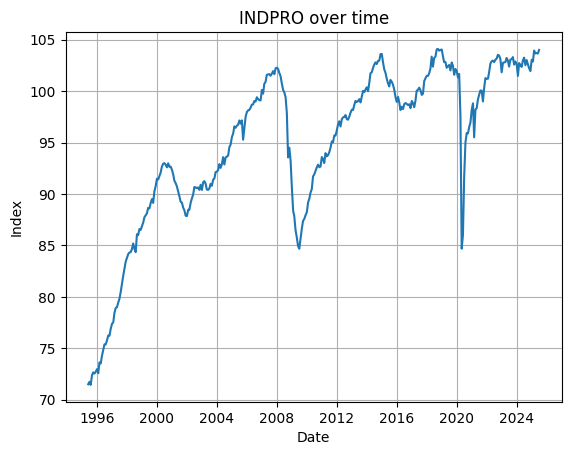

In [21]:
# Examine INDPRO trends
sns.lineplot(combined_df['INDPRO'])
plt.title('INDPRO over time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)

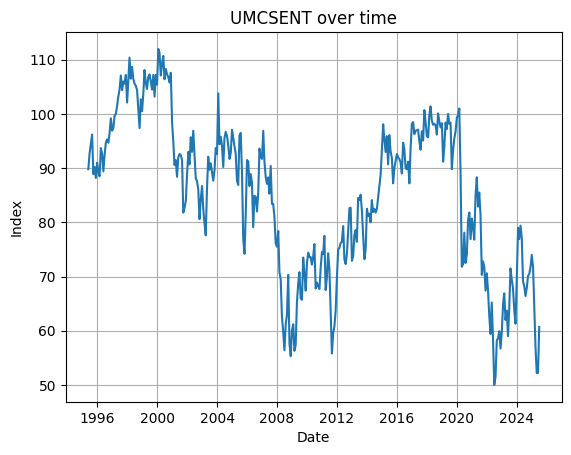

In [22]:
# Examine consumer sentiment trends
sns.lineplot(combined_df['UMCSENT'])
plt.title('UMCSENT over time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)

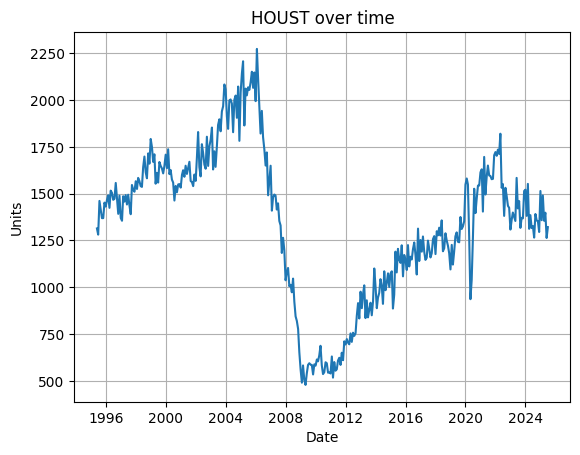

In [23]:
# Examine HOUST trends
sns.lineplot(combined_df['HOUST'])
plt.title('HOUST over time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.grid(True)

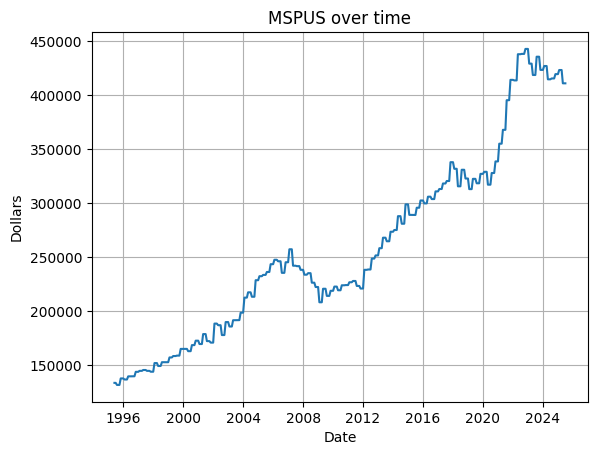

In [24]:
# Examine MSPUS trends
sns.lineplot(combined_df['MSPUS'])
plt.title('MSPUS over time')
plt.xlabel('Date')
plt.ylabel('Dollars')
plt.grid(True)

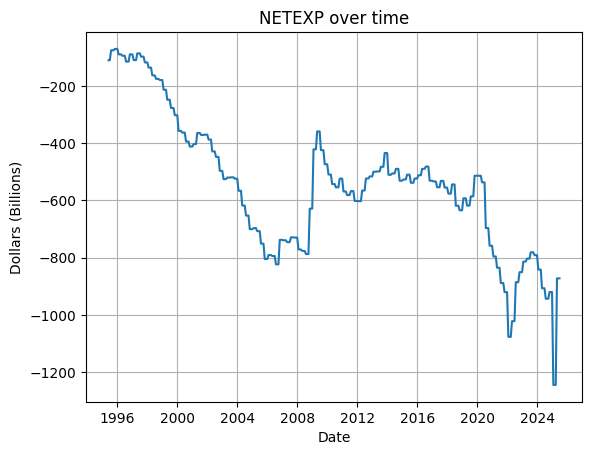

In [25]:
# Examine NETEXP trends
sns.lineplot(combined_df['NETEXP'])
plt.title('NETEXP over time')
plt.xlabel('Date')
plt.ylabel('Dollars (Billions)')
plt.grid(True)

Based on the plots of the features, the only outlier in the graphs would be when the unemployment rate spiked right around 2020. This is best explained by the COVID-19 pandemic, and I will keep an eye on it to make sure that this irregularity in what was going on in the world doesn't skew the bias of this feature too much. However, if we compare this to our S&P 500 data, we also see that the stock market was impacted by COVID-19, meaning that maybe there is some sort of inverse relationship between unemployment rates and the stock market value. It could still be the case that since unemployment rates grew because of COVID, this is what adversely affected the markets.

**NOTE**: I did not visualize the lags since that would be trivial. Those features would have the exact same graph as the features above except they would be shifted 3 spots. That does not create for an interesting or engaging use of the reader's time, and thus I shall exclude it for now. Just know that the graph should look identical in shape for the lags.

## Task 6: Outlier Check

In [26]:
Q1 = combined_df.quantile(0.25)
Q3 = combined_df.quantile(0.75)
IQR = Q3 - Q1

# Find outliers the IQR formula
outliers = ((combined_df < (Q1 - 1.5 * IQR)) | (combined_df > (Q3 + 1.5 * IQR)))

# Count number of outliers per feature
outlier_counts = outliers.sum()

print(outlier_counts)

CPI                0
UNRATE            34
FEDFUNDS           0
GS10               0
M2                 0
INDPRO            11
UMCSENT            0
HOUST              0
MSPUS              0
NETEXP             3
CPI_lag_1          0
UNRATE_lag_1      34
FEDFUNDS_lag_1     0
GS10_lag_1         0
M2_lag_1           0
INDPRO_lag_1      12
RSAFS_lag_1        0
UMCSENT_lag_1      0
HOUST_lag_1        0
MSPUS_lag_1        0
TWEXB_lag_1        0
NETEXP_lag_1       3
CPI_lag_2          0
UNRATE_lag_2      34
FEDFUNDS_lag_2     0
GS10_lag_2         0
M2_lag_2           0
INDPRO_lag_2      13
RSAFS_lag_2        0
UMCSENT_lag_2      0
HOUST_lag_2        0
MSPUS_lag_2        0
TWEXB_lag_2        0
NETEXP_lag_2       3
CPI_lag_3          0
UNRATE_lag_3      34
FEDFUNDS_lag_3     0
GS10_lag_3         0
M2_lag_3           0
INDPRO_lag_3      14
RSAFS_lag_3        0
UMCSENT_lag_3      0
HOUST_lag_3        0
MSPUS_lag_3        0
TWEXB_lag_3        0
NETEXP_lag_3       3
SP500_Close       18
dtype: int64


## Task 7: Train/Test Split

Beacuse I want to split my data chronologically, utilizing sklearn's 'train_test_split()' method will suffice as long as I set the 'shuffle' parameter equal to 'False' such that the data is not randomly sampled. This will instead section off the first 80% of my data as the training set and the latter 20% as my test set.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = combined_df.drop(columns=['SP500_Close'])
y = combined_df['SP500_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.tail(1)

,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,UMCSENT,HOUST,MSPUS,NETEXP,...,FEDFUNDS_lag_3,GS10_lag_3,M2_lag_3,INDPRO_lag_3,RSAFS_lag_3,UMCSENT_lag_3,HOUST_lag_3,MSPUS_lag_3,TWEXB_lag_3,NETEXP_lag_3
2016-05-31 23:59:59.999999999,239.557,4.8,0.37,1.81,12775.0,98.2549,94.7,1148.0,306000.0,-489.37,...,0.38,1.78,12578.2,98.9232,443117.0,91.7,1225.0,299800.0,115.2819,-511.682


In [29]:
X_test.head(1)

,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,UMCSENT,HOUST,MSPUS,NETEXP,...,FEDFUNDS_lag_3,GS10_lag_3,M2_lag_3,INDPRO_lag_3,RSAFS_lag_3,UMCSENT_lag_3,HOUST_lag_3,MSPUS_lag_3,TWEXB_lag_3,NETEXP_lag_3
2016-06-30 23:59:59.999999999,240.222,4.9,0.38,1.64,12835.4,98.7315,93.5,1203.0,306000.0,-489.37,...,0.36,1.89,12629.0,98.1635,441856.0,91.0,1111.0,299800.0,115.2819,-511.682


Since my testing data starts right after where my training data ends chronologically, this is a good sign that the data was split chronologically.

## Task 8: Modeling

Given the complexity of the task, I would like to utilize different models to see if one particular model drastically outperforms the others in predicting this problem. After talking with my advisor for this course, I have decided to utilize LASSO regression as my baseline model while also trying out Random Forest and XGBoost to see if there are any significant model scoring metric improvements. I will use RMSE, MAE, and R2 to score my models.

In [30]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_preds = lr.predict(X_train)
lr_test_preds = lr.predict(X_test)

train_performance = performance_metrics(y_train, lr_train_preds)
print('LR Train Performance:', train_performance)
test_performance = performance_metrics(y_test, lr_test_preds)
print('LR Test Performance:', test_performance)

LR Train Performance: {'RMSE': 56.71444222076962, 'MAE': 44.538303010724285, 'R2': 0.9762070993132781}
LR Test Performance: {'RMSE': 1053.4162854809729, 'MAE': 773.8984009694157, 'R2': 0.12341174489684181}


### LASSO Regression

In [34]:
# LASSO pipeline
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Hyperparameters
lasso_params = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# LASSO CV model
lasso_grid = GridSearchCV(lasso_pipe, 
                          param_grid=lasso_params, 
                          cv=TimeSeriesSplit(n_splits=5),
                          scoring='neg_mean_squared_error')

In [35]:
# Fit model and get best params
lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)

C:\Users\nnnak\anaconda3\envs\py310_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+03, tolerance: 1.621e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\envs\py310_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.330e+04, tolerance: 7.039e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\envs\py310_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

{'lasso__alpha': 1}


C:\Users\nnnak\anaconda3\envs\py310_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.310e+04, tolerance: 3.420e+03
  model = cd_fast.enet_coordinate_descent(


In [32]:
# Define function to score all models (LASSO, RandomForest, XGBoost) 
def performance_metrics(y_true, y_pred):
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

In [36]:
# Run predicts and compare training accuracy to testing accuracy
lasso_train_preds = lasso_grid.predict(X_train)
lasso_test_preds = lasso_grid.predict(X_test)

train_performance = performance_metrics(y_train, lasso_train_preds)
print('LASSO Train Performance:', train_performance)
test_performance = performance_metrics(y_test, lasso_test_preds)
print('LASSO Test Performance:', test_performance)

LASSO Train Performance: {'RMSE': 63.22424922344357, 'MAE': 50.801644811106996, 'R2': 0.9704316273378324}
LASSO Test Performance: {'RMSE': 1317.7609451376113, 'MAE': 1032.407194709817, 'R2': -0.3717306903862887}


In [37]:
print(lasso_grid.best_estimator_.named_steps['lasso'].coef_)

[ 0.00000000e+00 -2.84023228e+00  0.00000000e+00  9.32396631e+01
  2.19496199e+02  3.07088677e+01  6.53840881e+01 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  7.54142913e+01  1.34831298e+02
  5.50271408e+01  2.63046415e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.76463337e+01
  0.00000000e+00 -0.00000000e+00  9.22642191e-03  9.31293633e+01
  0.00000000e+00  1.18527824e+01 -1.82487927e+01 -0.00000000e+00
  0.00000000e+00  1.01319542e+01  0.00000000e+00 -0.00000000e+00
  6.04991871e+01 -8.86994357e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.63936646e+01 -1.58704848e+00 -1.28063732e+00
  2.10993193e+01  1.26610919e+02]


This is disappointing and concerning. LASSO has zeroed out all of the coefficients of the features which means that none of the features have any meaningful correlations with the target variable. Also, having a negative R2 score for my test data means that this model is doing worse than just predicting the mean for every value. However, I am hoping that this is just because LASSO is trying to capture the linear relationships between these variables and the target variable. As such, I will proceed with Random Forest with the hope that the features have some nonlinear correlation with the target variable.

### Random Forest

In [38]:
# Random Forest pipeline
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Hyperparameters
rf_params = {
    'rf__n_estimators': [500],
    'rf__max_depth': [1, 5, 10]
}

# RF Grid
rf_grid = GridSearchCV(rf_pipe, 
                       param_grid=rf_params,
                       cv=TimeSeriesSplit(n_splits=5), 
                       scoring='neg_mean_squared_error')

In [39]:
# Fit model and get best params
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)

{'rf__max_depth': 10, 'rf__n_estimators': 500}


In [40]:
# Run predicts and compare training accuracy to testing accuracy
rf_train_preds = rf_grid.predict(X_train)
rf_test_preds = rf_grid.predict(X_test)

train_performance = performance_metrics(y_train, rf_train_preds)
print('Random Forest Train Performance:', train_performance)
test_performance = performance_metrics(y_test, rf_test_preds)
print('Random Forest Train Performance:', test_performance)

Random Forest Train Performance: {'RMSE': 18.312747549488442, 'MAE': 13.324427830811487, 'R2': 0.9975193409450818}
Random Forest Train Performance: {'RMSE': 2048.2032875074774, 'MAE': 1705.8475978266629, 'R2': -2.313917626218323}


# TESTING

In [97]:
X = combined_df.drop(columns=['SP500_Shifted_Pct'])
y = (combined_df['SP500_Shifted_Pct'] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [98]:
# Fit model and get best params
lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)

{'lasso__alpha': 0.1}


C:\Users\nnnak\anaconda3\envs\py310_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.046e+00, tolerance: 2.502e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\envs\py310_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+00, tolerance: 5.010e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\envs\py310_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

In [99]:
# Run predicts and compare training accuracy to testing accuracy
lasso_train_preds = lasso_grid.predict(X_train)
lasso_test_preds = lasso_grid.predict(X_test)

train_performance = performance_metrics(y_train, lasso_train_preds)
print('LASSO Train Performance:', train_performance)
test_performance = performance_metrics(y_test, lasso_test_preds)
print('LASSO Test Performance:', test_performance)

LASSO Train Performance: {'RMSE': 0.4930772491270786, 'MAE': 0.4862503472134543, 'R2': 0.0}
LASSO Test Performance: {'RMSE': 0.47763072325836414, 'MAE': 0.47125628140703524, 'R2': -0.03716911002362688}


In [102]:
print(lasso_train_preds)

[0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457
 0.58291457 0.58291457 0.58291457 0.58291457 0.58291457 0.5829

In [103]:
print(lasso_grid.best_estimator_.named_steps['lasso'].coef_)

[ 0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0. -0.
  0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0.  0.  0.
 -0. -0.  0. -0.]


In [107]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))  # No LASSO (no penalty by default)
])

# ----- Hyperparameter grid -----
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l2'],            # Regular logistic regression
    'logreg__solver': ['lbfgs']           # Fast solver for L2
}

# ----- TimeSeriesSplit to avoid look-ahead bias -----
tscv = TimeSeriesSplit(n_splits=5)

grid = GridSearchCV(pipe, param_grid, cv=tscv, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# ----- Results -----
print("Best Params:", grid.best_params_)
print("Train Accuracy:", grid.score(X_train, y_train))
print("Test Accuracy:", grid.score(X_test, y_test))

# Detailed metrics
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Best Params: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Train Accuracy: 0.5879396984924623
Test Accuracy: 0.6733333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.67      1.00      0.80       101

    accuracy                           0.67       150
   macro avg       0.34      0.50      0.40       150
weighted avg       0.45      0.67      0.54       150

Confusion Matrix:
 [[  0  49]
 [  0 101]]
ROC AUC: 0.4920185896140635


C:\Users\nnnak\anaconda3\envs\py310_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\nnnak\anaconda3\envs\py310_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\nnnak\anaconda3\envs\py310_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

In [241]:
split = int(len(combined_df) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]